-Task 10: Do bigger delays lead to bigger fuel comsumption per passenger?
-We need to do four things to answer this as accurate as possible:

-Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
-Find out distance covered monthly by different air carriers
-Find out number of passengers that were carried by different air carriers
-Find out total fuel comsumption per air carrier.
-Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [37]:
import sys
import psycopg2

    
def db_to_csv(query,table):

    conn = psycopg2.connect(dbname = 'mid_term_project',
                            user = 'lhl_student',
                            password = 'lhl_student',
                            host = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com')
    cur = conn.cursor()
    outputquery = "COPY ({0}) TO STDOUT WITH CSV HEADER".format(query)
    file_name='z_{}.csv'.format(table)
    with open(file_name, 'w') as f:
        cur.copy_expert(outputquery, f)

    conn.close()

In [40]:
query = """select op_unique_carrier,fl_date,sum(arr_delay) arr_delay
             from flights 
            where cancelled=0 and arr_delay is not null
            group by op_unique_carrier,fl_date"""
db_to_csv(query,'delay')

In [38]:
query = """select unique_carrier,year,month,sum(distance) distance,sum(passengers) passengers
            from passengers
           where year in(2018,2019)
           group by unique_carrier,year,month"""
db_to_csv(query,'distance_passengers')

In [39]:
query = """select unique_carrier,year,month,sum(total_gallons) total_gallons
             from fuel_comsumption
            where year in(2018,2019)
            group by unique_carrier,year,month
            order by 1,2,3"""
db_to_csv(query,'fuel_comsumption')

In [41]:
#Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
import pandas as pd
df=pd.read_csv('z_delay.csv')
df['fl_yyyymm']=pd.to_datetime(df.fl_date, format='%Y-%m-%d').dt.strftime('%Y-%m')
df

,op_unique_carrier,fl_date,arr_delay,fl_yyyymm
0,9E,2018-01-01,4348,2018-01
1,9E,2018-01-02,2695,2018-01
2,9E,2018-01-03,632,2018-01
3,9E,2018-01-04,-557,2018-01
4,9E,2018-01-05,19056,2018-01
...,...,...,...,...
19054,ZW,2019-12-27,-3118,2019-12
19055,ZW,2019-12-28,-1924,2019-12
19056,ZW,2019-12-29,-1793,2019-12
19057,ZW,2019-12-30,8139,2019-12


In [43]:
df_delay_sum=df.groupby(['op_unique_carrier','fl_yyyymm']).agg({'arr_delay':'sum'})
df_delay_sum

arr_delay
op_unique_carrier fl_yyyymm           
9E                2018-01        55151
                  2018-02        84609
                  2018-03        66252
                  2018-04       137816
                  2018-05        38926
...                                ...
ZW                2019-08        78857
                  2019-09        47397
                  2019-10       -30286
                  2019-11        34008
                  2019-12        28289

[629 rows x 1 columns]

In [44]:
df_delay_sum_reindex=df_delay_sum.reset_index(level=['op_unique_carrier','fl_yyyymm'])
df_delay_sum_reindex

,op_unique_carrier,fl_yyyymm,arr_delay
0,9E,2018-01,55151
1,9E,2018-02,84609
2,9E,2018-03,66252
3,9E,2018-04,137816
4,9E,2018-05,38926
...,...,...,...
624,ZW,2019-08,78857
625,ZW,2019-09,47397
626,ZW,2019-10,-30286
627,ZW,2019-11,34008


In [45]:
df_delay_avg=df_delay_sum_reindex.groupby(['op_unique_carrier']).agg({'arr_delay':'mean'})
df_delay_avg

,arr_delay
op_unique_carrier,
9E,77197.666667
9K,-468.000000
AA,471833.958333
AS,9619.375000
AX,99365.583333
B6,278729.791667
C5,97330.958333
CP,45472.041667
DL,37423.166667


In [46]:
df_delay_avg=df_delay_avg.reset_index(level=['op_unique_carrier'])
df_delay_avg

,op_unique_carrier,arr_delay
0,9E,77197.666667
1,9K,-468.000000
2,AA,471833.958333
3,AS,9619.375000
4,AX,99365.583333
5,B6,278729.791667
6,C5,97330.958333
7,CP,45472.041667
8,DL,37423.166667
9,EM,4480.869565


In [47]:
#-Find out distance covered monthly by different air carriers; i think it is monthly average as well
df=pd.read_csv('z_distance_passengers.csv')
df

,unique_carrier,year,month,distance,passengers
0,L2,2019,12,27942,0
1,N8,2019,4,67140,0
2,EI,2018,10,103652,200584
3,XL,2018,1,8951,12250
4,OZ,2019,2,162224,115690
...,...,...,...,...,...
6794,CC,2018,12,73426,0
6795,0Q,2018,10,28578,27
6796,PY,2019,3,6204,3655
6797,D7,2019,2,8234,18113


In [48]:
df_distance_sum=df.groupby(['unique_carrier']).agg({'distance':'mean','passengers':'mean'})
df_distance_sum

,distance,passengers
unique_carrier,,
02Q,9941.090909,235.545455
04Q,49868.500000,3942.708333
07Q,19200.111111,6026.222222
09Q,483981.400000,100909.600000
0BQ,12442.789474,12.578947
...,...,...
Z3,2863.086957,596.391304
Z3Q,140.000000,2436.173913
ZK,4484.000000,2509.333333


In [50]:
df_distance_avg=df_distance_sum.reset_index(level=['unique_carrier'])
df_distance_avg

,unique_carrier,distance,passengers
0,02Q,9941.090909,235.545455
1,04Q,49868.500000,3942.708333
2,07Q,19200.111111,6026.222222
3,09Q,483981.400000,100909.600000
4,0BQ,12442.789474,12.578947
...,...,...,...
332,Z3,2863.086957,596.391304
333,Z3Q,140.000000,2436.173913
334,ZK,4484.000000,2509.333333
335,ZW,86748.291667,331633.458333


-Find out total fuel comsumption per air carrier.

In [52]:
df=pd.read_csv('z_fuel_comsumption.csv')
df

,unique_carrier,year,month,total_gallons
0,09Q,2018,1,1467426.0
1,09Q,2018,2,1648225.0
2,09Q,2018,3,2539355.0
3,09Q,2018,4,1119351.0
4,09Q,2018,5,975540.0
...,...,...,...,...
1053,YX,2019,5,18888.0
1054,YX,2019,6,18137.0
1055,YX,2019,7,27361.0
1056,YX,2019,8,22245.0


In [54]:
df_fuel_sum=df.groupby(['unique_carrier']).agg({'total_gallons':'mean'})
df_fuel_sum

,total_gallons
unique_carrier,
09Q,1.443060e+06
0WQ,4.360333e+03
1BQ,9.802453e+04
27Q,0.000000e+00
2HQ,2.895357e+05
3EQ,0.000000e+00
5V,3.759656e+05
5X,7.254714e+07
5Y,4.608557e+07


In [63]:
df_fuel_avg=df_fuel_sum[df_fuel_sum.total_gallons>0].reset_index(level=['unique_carrier'])
df_fuel_avg

,unique_carrier,total_gallons
0,09Q,1.443060e+06
1,0WQ,4.360333e+03
2,1BQ,9.802453e+04
3,2HQ,2.895357e+05
4,5V,3.759656e+05
5,5X,7.254714e+07
6,5Y,4.608557e+07
7,8C,7.403959e+05
8,9S,7.204613e+06
9,AA,3.055284e+08


In [64]:
#join df_fuel_avg with df_distance_avg
df_fuel_passenger_distance=pd.merge(df_fuel_avg,
                                    df_distance_avg,
                                    how='inner',
                                    left_on =['unique_carrier'],
                                    right_on=['unique_carrier'])
df_fuel_passenger_distance

,unique_carrier,total_gallons,distance,passengers
0,09Q,1.443060e+06,4.839814e+05,1.009096e+05
1,0WQ,4.360333e+03,7.866830e+04,2.295000e+02
2,1BQ,9.802453e+04,2.785205e+04,1.358742e+04
3,2HQ,2.895357e+05,2.478835e+04,2.988565e+03
4,5V,3.759656e+05,5.274250e+04,3.931667e+02
5,5X,7.254714e+07,1.048569e+06,0.000000e+00
6,5Y,4.608557e+07,5.896293e+05,1.337417e+03
7,8C,7.403959e+05,1.046188e+05,2.041667e+00
8,9S,7.204613e+06,7.558532e+04,0.000000e+00
9,AA,3.055284e+08,3.195767e+06,1.269777e+07


In [65]:
df_fuel_passenger_distance['gallon_passenger_km']=df_fuel_passenger_distance['total_gallons']/df_fuel_passenger_distance['passengers']/df_fuel_passenger_distance['distance']
df_fuel_passenger_distance

,unique_carrier,total_gallons,distance,passengers,gallon_passenger_km
0,09Q,1.443060e+06,4.839814e+05,1.009096e+05,2.954768e-05
1,0WQ,4.360333e+03,7.866830e+04,2.295000e+02,2.415112e-04
2,1BQ,9.802453e+04,2.785205e+04,1.358742e+04,2.590243e-04
3,2HQ,2.895357e+05,2.478835e+04,2.988565e+03,3.908335e-03
4,5V,3.759656e+05,5.274250e+04,3.931667e+02,1.813054e-02
5,5X,7.254714e+07,1.048569e+06,0.000000e+00,inf
6,5Y,4.608557e+07,5.896293e+05,1.337417e+03,5.844120e-02
7,8C,7.403959e+05,1.046188e+05,2.041667e+00,3.466325e+00
8,9S,7.204613e+06,7.558532e+04,0.000000e+00,inf
9,AA,3.055284e+08,3.195767e+06,1.269777e+07,7.529202e-06


In [66]:
#join df_fuel_passenger_distance with df_delay_avg
df_all=pd.merge(df_fuel_passenger_distance,
                                    df_delay_avg,
                                    how='inner',
                                    left_on =['unique_carrier'],
                                    right_on=['op_unique_carrier'])
df_all

,unique_carrier,total_gallons,distance,passengers,gallon_passenger_km,op_unique_carrier,arr_delay
0,AA,3.055284e+08,3.195767e+06,1.269777e+07,7.529202e-06,AA,471833.958333
1,AS,6.076106e+07,1.431218e+06,2.920384e+06,1.453716e-05,AS,9619.375000
2,B6,7.216545e+07,8.951099e+05,3.545438e+06,2.273961e-05,B6,278729.791667
3,DL,3.005069e+08,3.982086e+06,1.313163e+07,5.746788e-06,DL,37423.166667
4,F9,2.251769e+07,1.184282e+06,1.776412e+06,1.070348e-05,F9,117922.208333
5,G4,1.621199e+07,9.630510e+05,1.207058e+06,1.394630e-05,G4,74436.833333
6,HA,2.263476e+07,2.496831e+05,9.655270e+05,9.389064e-05,HA,5206.541667
7,NK,3.650923e+07,9.453164e+05,2.658692e+06,1.452639e-05,NK,80239.333333
8,OO,8.337353e+06,1.332179e+06,3.397631e+06,1.841999e-06,OO,470298.041667
9,UA,2.916056e+08,4.860222e+06,9.600462e+06,6.249533e-06,UA,361401.875000


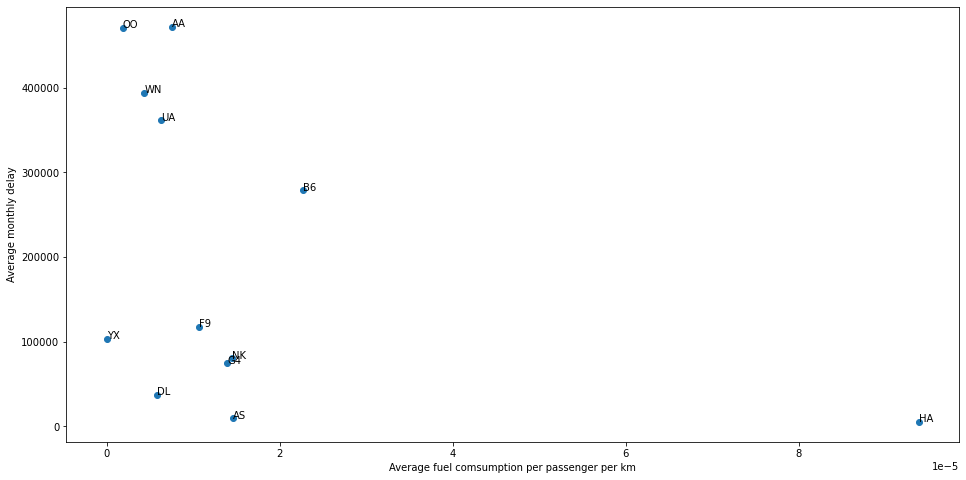

In [76]:
import matplotlib.pyplot as plt
x=df_all['gallon_passenger_km'].to_list()
y=df_all['arr_delay'].to_list()
n=df_all['unique_carrier'].to_list()

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x,y)
ax.set_ylabel('Average monthly delay')
ax.set_xlabel('Average fuel comsumption per passenger per km')
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))